<ul><li style="font-weight: bold; font-size: 24px">Importing Required Modules</li></ul>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [5]:
df = pd.read_csv("processed_train.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,0,1
2,1,3,1,26.0,0,0,7.9250,1,0
3,1,1,1,35.0,1,0,53.1000,1,0
4,0,3,0,35.0,0,0,8.0500,2,0


In [6]:
X = df.drop(columns="Survived")
Y = df["Survived"]

<ul><li style="font-weight: bold; font-size: 24px">Train Test Split</li></ul>

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
X_train.shape, Y_train.shape

((711, 8), (711,))

In [10]:
X_test.shape, Y_test.shape

((178, 8), (178,))

<ul><li style="font-weight: bold; font-size: 24px">Model Building</li></ul>

In [114]:
model = RandomForestClassifier(n_estimators=90,criterion="entropy")

In [115]:
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90)

In [116]:
model.score(X_test, Y_test)

0.8033707865168539

<ul><li style="font-weight: bold; font-size: 24px">Prediction</li></ul>

In [117]:
prediction = model.predict(X_test)
prediction

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [121]:
# Checking First 10 Truth Values
Y_test = np.array(Y_test)
for i in range(10):
    print("Accurate = {}, Predicted = {}".format(Y_test[i], prediction[i]))

Accurate = 1, Predicted = 1
Accurate = 0, Predicted = 0
Accurate = 0, Predicted = 1
Accurate = 0, Predicted = 0
Accurate = 0, Predicted = 0
Accurate = 1, Predicted = 1
Accurate = 1, Predicted = 0
Accurate = 0, Predicted = 0
Accurate = 1, Predicted = 0
Accurate = 0, Predicted = 0


<ul><li style="font-weight: bold; font-size: 24px">Confusion Matrix</li></ul>

In [132]:
mat = confusion_matrix(Y_test, prediction)
mat

array([[105,  14],
       [ 21,  38]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

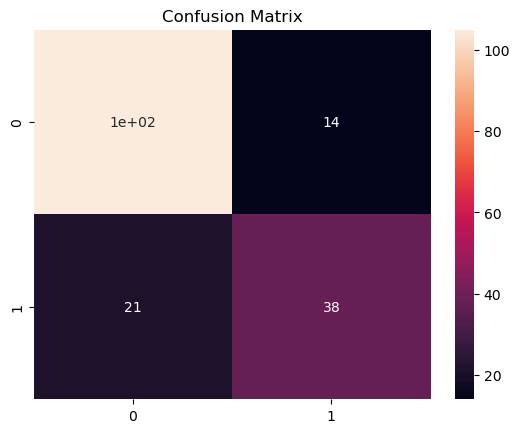

In [136]:
# more good with seaborn
sns.heatmap(mat, annot=True)
plt.title("Confusion Matrix")

<ul><li style="font-weight: bold; font-size: 24px">Saving The Model</li></ul>

In [138]:
import joblib
from joblib import dump, load

In [139]:
dump(model, "model.joblib")

['model.joblib']